# Homework 3

In [2]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import solve, eig
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
EPS = np.finfo(float).eps
print('Machine Epsilon:')
print(EPS)

Machine Epsilon:
2.22044604925e-16


## 10.18

In [4]:
a = 1.0
b = 1.7
def calc_w(xi, x):
    return np.prod(x - xi)

def check1018(n):
    xi = np.arange(0, 1, 1.0/n)
    approx1 = np.exp(-a*n)
    approx2 = np.exp(-b*n)
    return np.array([
        [approx1, abs(calc_w(xi, 0.5/n))],
        [approx2, abs(calc_w(xi, 0.5))],
    ])

odds = range(3, 100, 2)
dat = np.empty((len(odds), 2, 2))
dat.shape
for i, n in enumerate(odds):
    dat[i] = check1018(n)

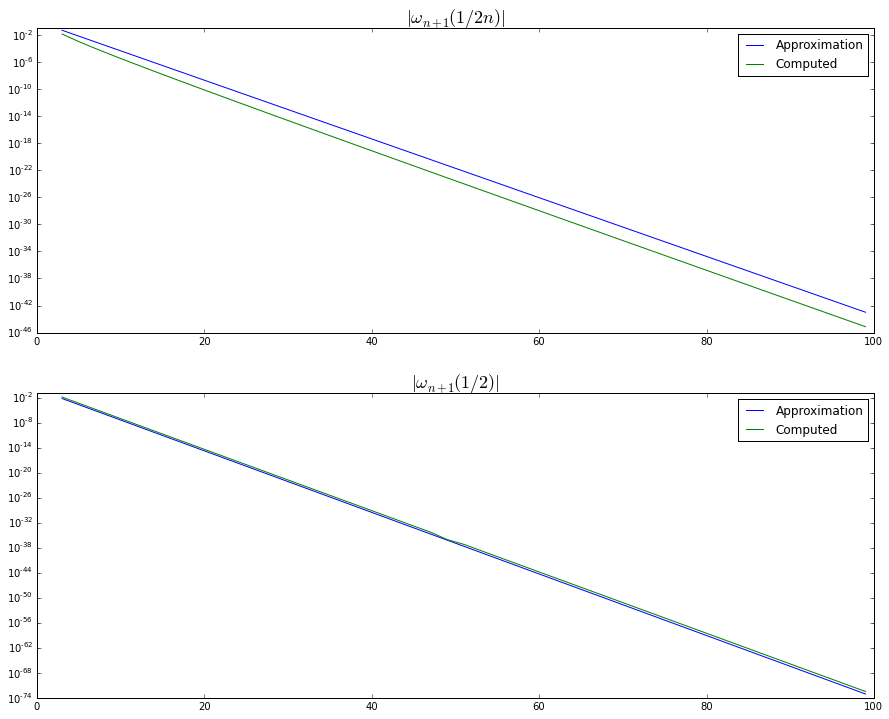

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,12), nrows=2)
ax1.semilogy(odds, dat[:, 0, 0], label='Approximation')
ax1.semilogy(odds, dat[:, 0, 1], label='Computed')
ax1.legend()
ax1.set_title('$|\omega_{n+1}(1/2n)|$', fontsize=18)
ax2.semilogy(odds, dat[:, 1, 0], label='Approximation')
ax2.semilogy(odds, dat[:, 1, 1], label='Computed')
ax2.set_title('$|\omega_{n+1}(1/2)|$', fontsize=18)
ax2.legend()
plt.show()

### Close enough.

---

## 15.13

The exact eigenvalues are:
$$
\lambda = -1 \pm \sqrt{6} \approx \Big\{1.4494897, -3.4494897\Big\}
$$

# TO DO
# TO DO
# TO Do

### Algorithm 15.4

$$
y_k = Ax_k \quad\quad x_{k+1} = \frac{1}{||y_k||_2}y_k
$$

---

## 6.

In [28]:
data = np.array([(0, 3), (1, 5), (2, -1), (3, 2)], dtype=float)

In [41]:
def p(degree, x):
    n = degree + 1
    xd, yd = data[:n].T
    c = yd.copy()
    for i in range(1, len(c)):
        c[i:] = (c[i:] - c[i - 1:-1])/(xd[i:] - xd[:-i])
    r = c[0]
    for j in range(1, n):
        r += c[j]*np.prod(x - xd[:j])
    return r

In [42]:
for degree in (1, 2, 3):
    r = p(degree, 0.05)
    print('Degree %i: p(%.2f) = %.6f' % (degree, 0.05, r))

Degree 1: p(0.05) = 3.100000
Degree 2: p(0.05) = 3.290000
Degree 3: p(0.05) = 3.552437


----

## 7.

$$
\int_{0.5}^{1}x^4 dx = \frac{x^5}{5}\big|_{0.5}^1 = \frac{1 - 0.5^{5}}{5} \approx 0.19375
$$

In [6]:
def trapz(f, a, b):
    return 0.5*(f(b) + f(a))*(b - a)

In [7]:
exact = 0.19375
a = 0.5
b = 1.0
f = lambda x: x**4
r = trapz(f, a, b)
relerr = 100*abs(r - exact)/exact
print('Result: %.5f' % r)
print('Relative Error: %.5f%%' % relerr)

Result: 0.26562
Relative Error: 37.09677%


## 8.

$$
\int_1^2 x \ln x ~dx \approx 0.636294
$$

In [8]:
exact = 0.636294
n = 3
a = 1.0
b = 2.0
h = (b - a)/n
points = [i*h + a for i in range(n + 1)]
points

[1.0, 1.3333333333333333, 1.6666666666666665, 2.0]

In [9]:
f = lambda x: np.log(x)*x
r = 0
for i in range(n):
    r += trapz(f, points[i], points[i + 1])

In [10]:
relerr = 100*abs(r - exact)/exact
print('Result: %.5f' % r)
print('Relative Error: %.5f%%' % relerr)

Result: 0.64270
Relative Error: 1.00673%


## 9.

In [11]:
A = np.array([
    [-4, 14, 0],
    [-5, 13, 0],
    [-1, 0, 0],
])
x0 = np.ones(3)

In [12]:
eigvals, eigvecs = eig(A)
s = np.argsort(eigvals)
eigvals, eigvecs = eigvals[s], eigvecs[:, s]
print('Eigenvalue : Eigenvector pairs')
print('\n'.join(
    ['%s : %s' % (eigvals[i], eigvecs[:, i])
     for i in range(len(eigvals))]
))

Eigenvalue : Eigenvector pairs
0j : [ 0.  0.  1.]
(3+0j) : [ 0.85714286  0.42857143 -0.28571429]
(6+0j) : [ 0.80635149  0.57596535 -0.13439192]


In [13]:
def pwrmethod(x):
    y = A.dot(x)
    return y/norm(y)

def rayleigh(x):
    xs = np.conj(x)
    return (xs.dot(A).dot(x))/(xs.dot(x))

In [50]:
def q9(x0, tol):
    x = x0
    lam = np.nan
    for i in range(100):
        xn = pwrmethod(x)
        lamn = rayleigh(xn)
        if abs(lamn - lam) < tol:
            break
        x, lam = xn, lamn
    else:
        print('Maximum number of iterations reached.')
    return x, lamn, i

In [51]:
x, lam, iters = q9(x0, 100*EPS)
print('x = %s' % x)
print('lambda = %.16f' % lam)
print('number of iterations : %i' % iters)

x = [ 0.80635149  0.57596535 -0.13439192]
lambda = 6.0000000000000204
number of iterations : 45


## 10.

In [52]:
def q10(x0, tol):
    x = x0
    lam = np.nan
    for i in range(100):
        x1 = pwrmethod(x)
        x2 = pwrmethod(x1)
        # Aitken's method
        delta = x1 - x
        if abs(delta).max() < tol:
            break
        delta2 = x - 2*x1 + x2
        aitken = x - delta**2/delta2
        lamn = rayleigh(x)
        x, lam = aitken, lamn
    else:
        print('Maximum number of iterations reached.')
    return x, lamn, i

In [53]:
x, lam, iters = q10(x0, 100*EPS)
print('x = %s' % x)
print('lambda = %.16f' % lam)
print('number of iterations : %i' % iters)

x = [ 0.80635149  0.57596535 -0.13439192]
lambda = 5.9999999999996030
number of iterations : 9


In [57]:
t9 = %timeit -o q9(x0, 100*EPS)

1000 loops, best of 3: 743 µs per loop


In [58]:
t10 = %timeit -o q10(x0, 100*EPS)

1000 loops, best of 3: 388 µs per loop


In [59]:
ratio = 100*(t10.best/t9.best)
print("Aitken's delta squared method makes the computation take\n"
      "%.1f%% of the time." % ratio)

Aitken's delta squared method makes the computation take
52.2% of the time.


## 11.

In [ ]:
I = np.eye(len(A))
def invpwrmethod(x, mu):
    y = solve(A - mu*I, x)
    return y/norm(y)

In [ ]:
def q11(x0, mu):
    x = x0
    lam = np.nan
    for i in range(100):
        xn = invpwrmethod(x, mu)
        lamn = rayleigh(xn)
        if abs(lamn - lam) < EPS:
            break
        x, lam = xn, lamn
    else:
        print('Maximum number of iterations reached.')
    return x, lamn, i

In [ ]:
x, lam, iters = q11(x0, 3.5)
print('x = %s' % x)
print('lambda = %.16f' % lam)
print('number of iterations : %i' % iters)